### Geographical Visualisation using Basemap

In [1]:
#Importing required packages

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

#### Trying out different projections

1.Orthogonal Projection

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


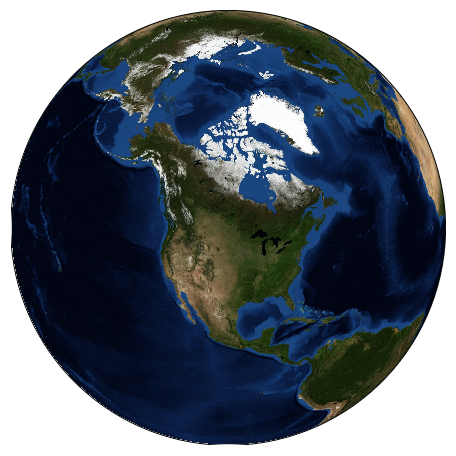

In [2]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

2.Conical Map Projection and plotting Seattle in the map

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


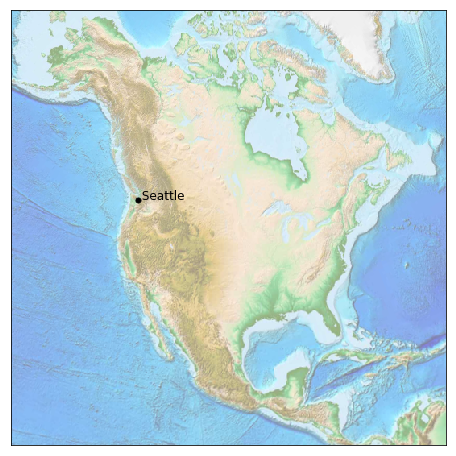

In [3]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

3.Cylindrical Map Projection

In [4]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

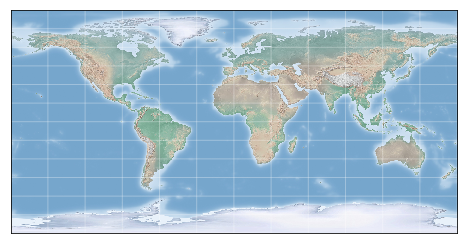

In [5]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

4.Pseudo Cylindrical Map Projection

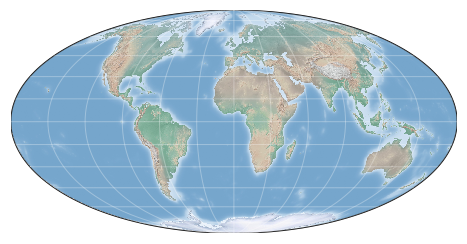

In [6]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

5.Orthogonal Map Projection at Different Orientation

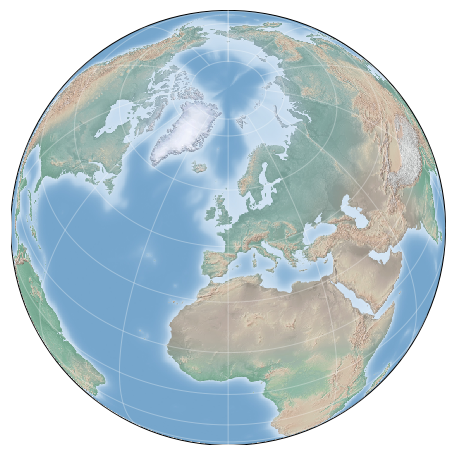

In [7]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m);

6.Zooming into Map

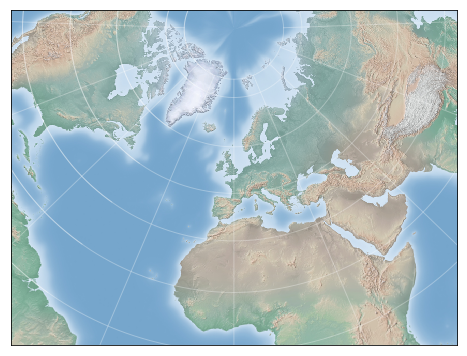

In [8]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)

#### Color Mapping Based on Population and Area Size of cities in California

In [9]:
import pandas as pd
cities = pd.read_csv('california_cities.csv')

In [10]:
# Extract the data we're interested in
lat = cities['latd'].values
lon = cities['longd'].values

In [11]:
population = cities['population_total'].values
area = cities['area_total_km2'].values

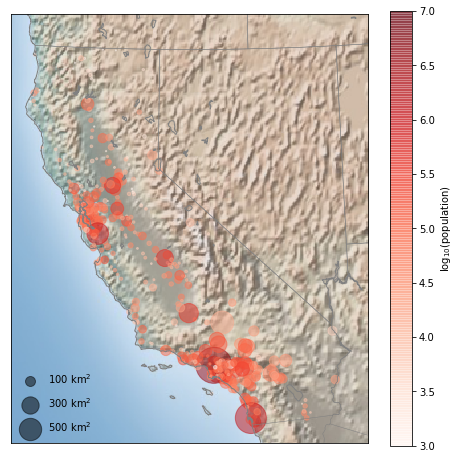

In [12]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()

m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

#### Mapping a Geographic Point

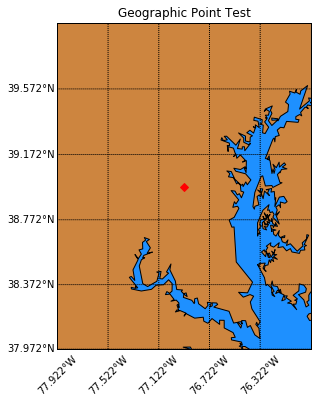

In [13]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# input desired coordinates
my_coords = [38.9719980,-76.9219820]

# How much to zoom from coordinates (in degrees)
zoom_scale = 1

# Setup the bounding box for the zoom and bounds of the map
bbox = [my_coords[0]-zoom_scale,my_coords[0]+zoom_scale,\
        my_coords[1]-zoom_scale,my_coords[1]+zoom_scale]

plt.figure(figsize=(12,6))
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.fillcontinents(color='peru',lake_color='dodgerblue')

# draw parallels, meridians, and color boundaries
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45)
m.drawmapboundary(fill_color='dodgerblue')

# build and plot coordinates onto map
x,y = m(my_coords[1],my_coords[0])
m.plot(x,y,marker='D',color='r')
plt.title("Geographic Point Test")
plt.savefig('coordinate_test.png', format='png', dpi=500)
plt.show()

#### Distribution of ASOS stations in the U.S. and its territories. 

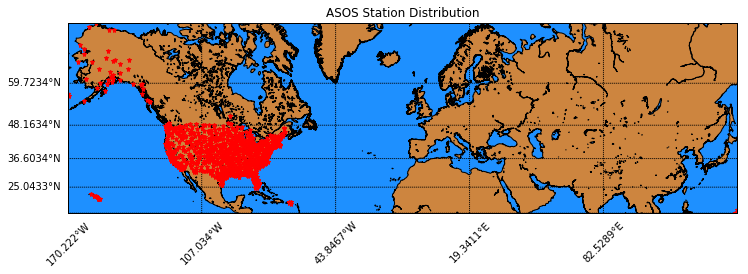

In [14]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import csv

lats, lons,names,altitude = [],[],[],[]

# the asos_stations file can be found here: 
# https://engineersportal.com/s/asos_stations.csv
with open('asos_stations.csv') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=',')
    for data in reader:
        names.append(data['CALL'])
        lats.append(float(data['LAT']))
        lons.append(float(data['LON']))
        altitude.append(float(data['ELEV']))

# How much to zoom from coordinates (in degrees)
zoom_scale = 0

# Setup the bounding box for the zoom and bounds of the map
bbox = [np.min(lats)-zoom_scale,np.max(lats)+zoom_scale,\
        np.min(lons)-zoom_scale,np.max(lons)+zoom_scale]

plt.figure(figsize=(12,6))
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.fillcontinents(color='peru',lake_color='dodgerblue')

# draw parallels, meridians, and color boundaries
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45)
m.drawmapboundary(fill_color='dodgerblue')

# build and plot coordinates onto map
x,y = m(lons,lats)
m.plot(x,y,'r*',markersize=5)
plt.title("ASOS Station Distribution")
plt.savefig('asos_station_plot.png', format='png', dpi=500)
plt.show()

Because of the projection, the entire width of the world is plotted due to the inclusion of Alaska's Archipelago. This can be clipped by limiting the bounds of the map.

####  Zooming into above map and color coding based on elevation

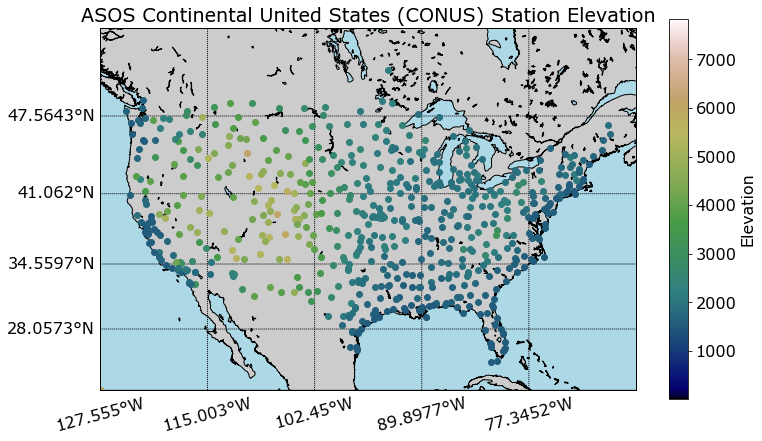

In [15]:
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import csv

# setting parameters for title and axes
font = {'family' : 'verdana',
        'size'   : 16}
matplotlib.rc('font', **font)

# Grabbing the .csv data
lats,lons,names,altitude = [],[],[],[]
temp_dat = []
with open('asos_stations.csv') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=',')
    for data in reader:
        if float(data['UTC'])>-5. or float(data['UTC'])<-8. or float(data['ELEV'])<0.0:
            continue
        names.append('K'+data['CALL'])
        lats.append(float(data['LAT']))
        lons.append(float(data['LON']))
        altitude.append(float(data['ELEV']))
        
# How much to zoom from coordinates (in degrees)
zoom_scale = 3

# Setup the bounding box for the zoom and bounds of the map
bbox = [np.min(lats)-zoom_scale,np.max(lats)+zoom_scale,\
        np.min(lons)-zoom_scale,np.max(lons)+zoom_scale]

fig, ax = plt.subplots(figsize=(12,7))
plt.title("ASOS Continental United States (CONUS) Station Elevation")
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.fillcontinents(color='#CCCCCC',lake_color='lightblue')

# draw parallels, meridians, and color boundaries
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=15)
m.drawmapboundary(fill_color='lightblue')

# format colors for elevation range
alt_min = np.min(altitude)
alt_max = np.max(altitude)
cmap = plt.get_cmap('gist_earth')
normalize = matplotlib.colors.Normalize(vmin=alt_min, vmax=alt_max)

# plot elevations with different colors using the numpy interpolation mapping tool
# the range [50,200] can be changed to create different colors and ranges
for ii in range(0,len(altitude)):
    x,y = m(lons[ii],lats[ii])
    color_interp = np.interp(altitude[ii],[alt_min,alt_max],[50,200])
    plt.plot(x,y,3,marker='o',color=cmap(int(color_interp)))

# format the colorbar 
cax, _ = matplotlib.colorbar.make_axes(ax)
cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap,norm=normalize,label='Elevation')

# save the figure and show it
plt.savefig('asos_station_elevation.png', format='png', dpi=500,transparent=True)
plt.show()

#### Plotting contour lines on basemap

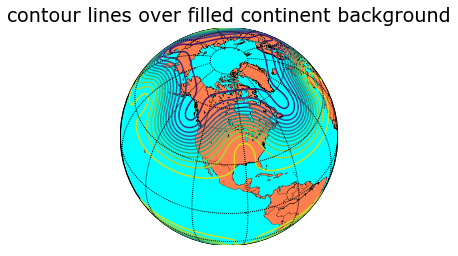

In [16]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()

#### Plotting points in basemap

In [17]:
# This just lets the output of the following code samples
#  display inline on this page, at an appropriate size.
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = (8,6)

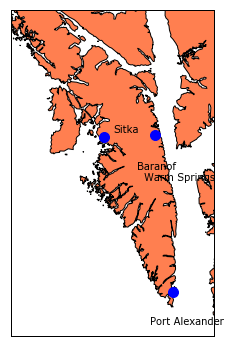

In [18]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
my_map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-136.25, llcrnrlat=56.0,
    urcrnrlon=-134.25, urcrnrlat=57.75)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'coral')
my_map.drawmapboundary()
 
lons = [-135.3318, -134.8331, -134.6572]
lats = [57.0799, 57.0894, 56.2399]
x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=10)
 
labels = ['Sitka', 'Baranof\n  Warm Springs', 'Port Alexander']
x_offsets = [10000, -20000, -25000]
y_offsets = [5000, -50000, -35000]

for label, xpt, ypt, x_offset, y_offset in zip(labels, x, y, x_offsets, y_offsets):
    plt.text(xpt+x_offset, ypt+y_offset, label)
 
plt.show()

#### Plotting earthquakes in a day over the world and color coded based on intensity of earthquake

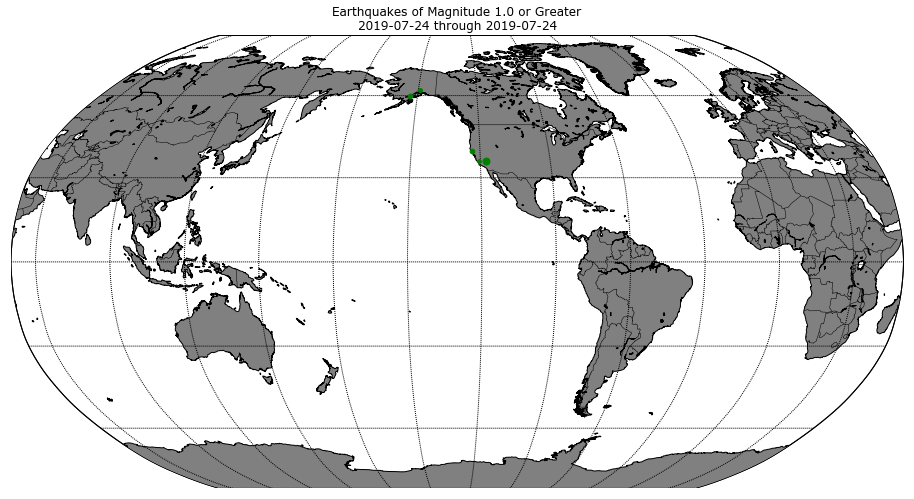

In [19]:
import csv

# Open the earthquake data file.
filename = '1.0_hour.csv'

# Create empty lists for the data we are interested in.
lats, lons = [], []
magnitudes = []
timestrings = []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
        magnitudes.append(float(row[4]))
        timestrings.append(row[0])
        
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')

# Make this plot larger.
plt.figure(figsize=(16,12))

eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 2.5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)
    
title_string = "Earthquakes of Magnitude 1.0 or Greater\n"
title_string += "%s through %s" % (timestrings[-1][:10], timestrings[0][:10])
plt.title(title_string)

plt.show()

#### Plotting earthquakes in a day over the world and color coded based on intensity of earthquake

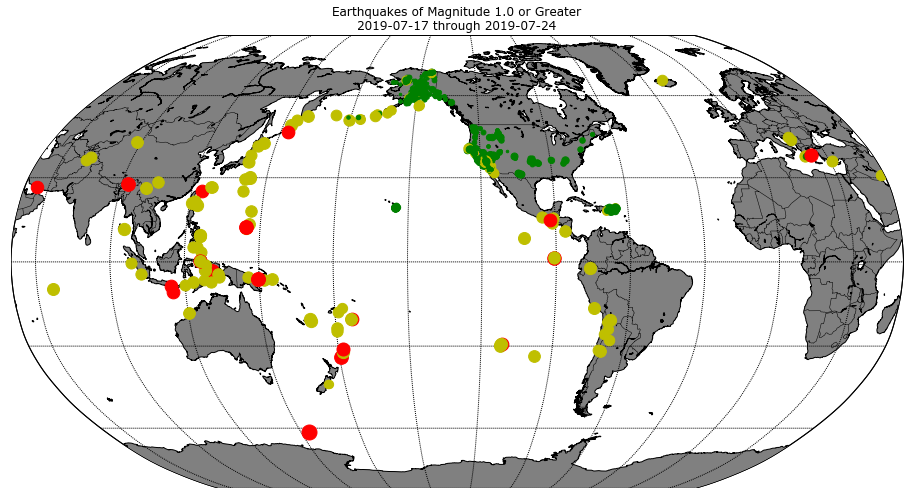

In [20]:
import csv

# Open the earthquake data file.
filename = '1.0_week.csv'

# Create empty lists for the data we are interested in.
lats, lons = [], []
magnitudes = []
timestrings = []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
        magnitudes.append(float(row[4]))
        timestrings.append(row[0])
        
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')

# Make this plot larger.
plt.figure(figsize=(16,12))

eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 2.5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)
    
title_string = "Earthquakes of Magnitude 1.0 or Greater\n"
title_string += "%s through %s" % (timestrings[-1][:10], timestrings[0][:10])
plt.title(title_string)

plt.show()